In [4]:
import pandas as pd
from camel_tools.sentiment import SentimentAnalyzer
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt


In [5]:
#load Prep and clean data 
ArNews_df_update = pd.read_csv("/Users/AlaAlBinSaleh/Desktop/Desktop/Capstone/ArNews_df_Cleaned.csv", index_col=[0])

In [6]:
sentiment = SentimentAnalyzer.pretrained()

In [7]:
def Sentiment_Analysis(text):
  try:
    return sentiment.predict(text)
  except:
    return None

In [6]:
ArNews_df_update["sentiment"] = ArNews_df_update['content'].apply(Sentiment_Analysis)

applying this Sentiment Analyzer is computational intensive. Therefore,I took a sample of the dataset to get the sentiment analysis 

In [8]:
partial_df = ArNews_df_update[:1000]

###sentiment analysis on uncleaned content 

In [8]:
partial_df["sentiment"] = partial_df['content'].apply(Sentiment_Analysis)

/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_87840/3380726870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df["sentiment"] = partial_df['content'].apply(Sentiment_Analysis)


In [26]:
partial_df['sentiment'].iloc[997]

'neutral'

In [25]:

#convert into sentiment results into a string for plot
partial_df['sentiment'] = partial_df.sentiment.str.replace("[","")
partial_df['sentiment'] = partial_df.sentiment.str.replace("]","")
partial_df['sentiment'] = partial_df.sentiment.str.replace("'","")

/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_87840/4072026381.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  partial_df['sentiment'] = partial_df.sentiment.str.replace("[","")
/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_87840/4072026381.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  partial_df['sentiment'] = partial_df.sentiment.str.replace("]","")


###plot the sentiment result 

Text(0, 0.5, 'count')

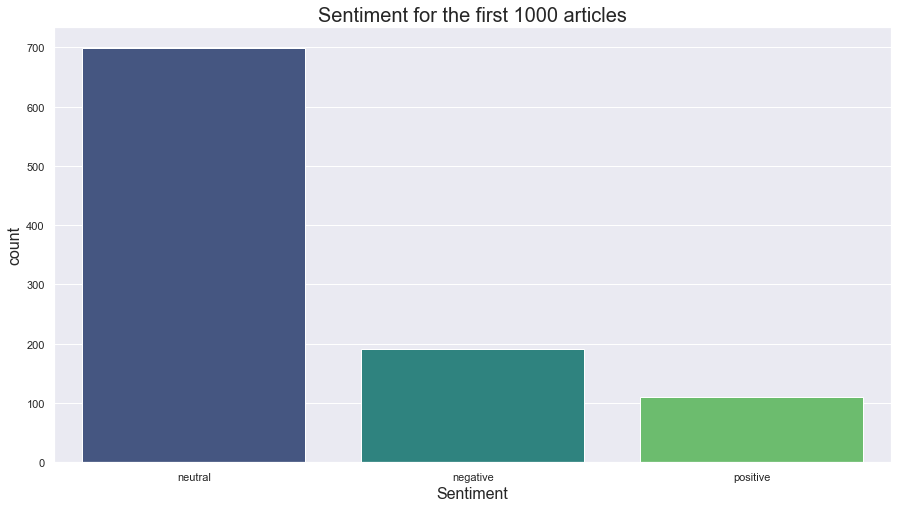

In [30]:
sns.countplot(x = "sentiment", 
               data = partial_df,
                palette=sns.color_palette("viridis", 3)
            )
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('Sentiment for the first 1000 articles', fontsize=20)
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('count', fontsize=16)

###sentiment analysis on cleaned content 

In [18]:
partial_df["sentiment_Detokenize"] = partial_df['Detokenize'].apply(Sentiment_Analysis)

/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_87843/2885715113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df["sentiment_Detokenize"] = partial_df['Detokenize'].apply(Sentiment_Analysis)


In [63]:
partial_df['sentiment_2']= partial_df['sentiment_Detokenize'].astype(str).str.replace("]", "")
partial_df['sentiment_2']= partial_df['sentiment_2'].astype(str).str.replace("[", "")


/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_87843/847205471.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  partial_df['sentiment_2']= partial_df['sentiment_Detokenize'].astype(str).str.replace("]", "")
/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_87843/847205471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df['sentiment_2']= partial_df['sentiment_Detokenize'].astype(str).str.replace("]", "")
/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_87843/847205471.py:2: FutureWarning: The default value of regex will change from True to False 

#plot the sentiment result 

Text(0, 0.5, 'count')

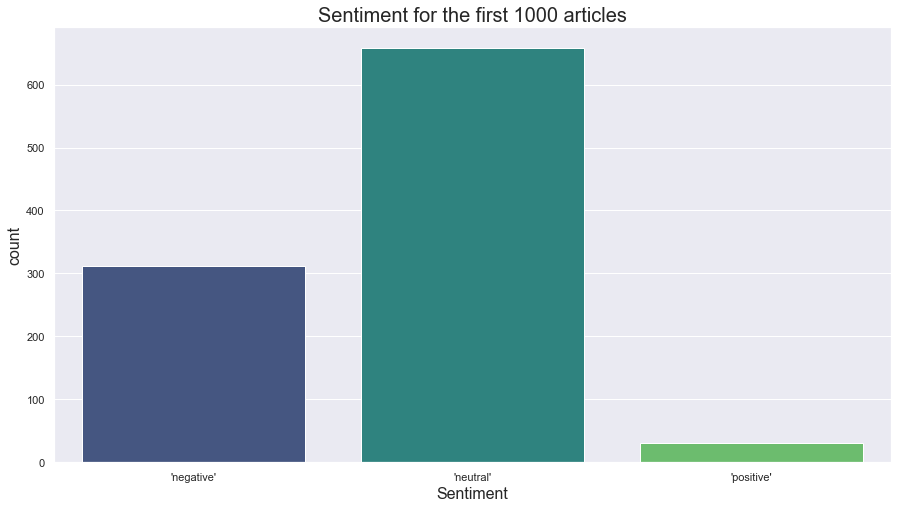

In [66]:
sns.countplot(x = "sentiment_2", 
               data = partial_df.sort_values("sentiment_2"),
                palette=sns.color_palette("viridis", 3), 
            )
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('Sentiment for the first 1000 articles', fontsize=20)
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('count', fontsize=16)